In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import sys

TINDER_MODULES_PATH = '/Applications/MAMP/htdocs/tinder_engine'
sys.path.append(TINDER_MODULES_PATH)

from modules import features
from modules import tinder_api as api

In [3]:
LIKED_USERS_PATH = '../dumps/liked_users.json'
liked_user_df = pd.read_json(LIKED_USERS_PATH, orient='index')
liked_user_df.head()

,age,avg_successRate,bio,common_like_count,distance,gender,jobs,liked_datetime,name,photos,schools,teaser,teasers
510ac82d5d9e678a0300041f,22,-1,Californian traveling around looking for FRIEN...,0,21,1,"[{'company': {'name': 'UC Berkeley'}, 'title':...",2017/08/13 22:14:09,Atha,[http://images.gotinder.com/510ac82d5d9e678a03...,"[{'name': 'Instituto Internacional de Madrid',...","{'string': 'UC Berkeley', 'type': 'school'}",[{'string': 'Instituto Internacional de Madrid...
5111bdf138e0088a490004a9,23,-1,In Japan until Labor Day 🇯🇵 \n\nUCSB grad (Eco...,0,24,1,"[{'company': {'name': 'Deckers Brands'}, 'titl...",2017/08/28 22:59:26,Coco,[http://images.gotinder.com/5111bdf138e0088a49...,"[{'name': 'University of California, Santa Bar...",{'string': 'Digital Marketing at Deckers Brand...,[{'string': 'Digital Marketing at Deckers Bran...
511fcb7b307801926900047f,21,-1,🎈 Montreal • DC • Shanghai\n\nInsta: mcatnip_,0,25,1,[],2017/08/28 22:34:17,Catherine,[http://images.gotinder.com/511fcb7b3078019269...,"[{'name': 'The George Washington University', ...","{'string': 'The George Washington University',...",[{'string': 'The George Washington University'...
512cf68daee92de421000780,20,-1,KAΘ\n\nBoston // Providence,0,1,1,[],2017/08/17 17:56:09,Jen,[http://images.gotinder.com/512cf68daee92de421...,"[{'name': 'Brown University', 'id': '140998521...","{'string': 'Brown University', 'type': 'school'}","[{'string': 'Brown University', 'type': 'schoo..."
51acfe82fa45235977000c7c,23,-1,I like food. I am a music snob. Intelligence i...,0,19,1,[{'company': {'name': 'The Ice Cream Truck'}}],2017/08/14 11:42:14,Allison,[http://images.gotinder.com/51acfe82fa45235977...,"[{'name': 'University of California, San Diego...","{'string': 'The Ice Cream Truck', 'type': 'pos...","[{'string': 'The Ice Cream Truck', 'type': 'po..."


In [4]:
liked_user_df.describe()

,age,avg_successRate,common_like_count,distance,gender
count,10582.000000,10582,10582.000000,10582.000000,10582
mean,22.762049,-1,0.013136,40.774145,1
std,3.394498,0,0.217201,309.553778,0
min,17.000000,-1,0.000000,0.000000,1
25%,20.000000,-1,0.000000,16.000000,1
50%,22.000000,-1,0.000000,22.000000,1
75%,25.000000,-1,0.000000,29.000000,1
max,36.000000,-1,15.000000,7443.000000,1


In [5]:
liked_user_df.shape

(10582, 13)

In [6]:
if api.authverif() == True:
    print("Gathering Data on your matches...")
    match_info = features.get_match_info()
    match_df = DataFrame(match_info)
    match_df = match_df.T
else:
    print("Something went wrong. You were not authorized.")

You have been successfully authorized!
Gathering Data on your matches...
All data stored in: match_info


In [7]:
match_df.head()

,age,avg_successRate,bio,distance,gender,last_activity_date,match_id,message_count,messages,name,photos
545c6d1607b624a06393306b,23,-1,Nachacha \nBangkok university,2840,1,2017-07-08T03:38:26.184Z,545c6d1607b624a06393306b5927bdeb3b0adde27cd8b4a3,0,"[{'_id': '5960475fa60e00b90c1202c5', 'created_...",Nachacha,[http://images.gotinder.com/545c6d1607b624a063...
5556082e4831602d391835e7,24,0.5420399,,25,1,2017-08-04T03:19:42.891Z,5556082e4831602d391835e75927bdeb3b0adde27cd8b4a3,0,"[{'_id': '5981d7af989f6047033f0109', 'created_...",Yukino,[http://images.gotinder.com/5556082e4831602d39...
55d7b43c54ee14853f5d7792,20,-1,American studying abroad in Tokyo\nVideo Games...,217,1,2017-08-10T14:00:18.542Z,55d7b43c54ee14853f5d77925927bdeb3b0adde27cd8b4a3,0,"[{'_id': '598c668e7ab2efca39f7811a', 'created_...",Abby,[http://images.gotinder.com/55d7b43c54ee14853f...
562fcbd4296e9c9477e804a4,24,-1,,2851,1,2017-05-26T14:35:56.022Z,562fcbd4296e9c9477e804a45927bdeb3b0adde27cd8b4a3,0,"[{'_id': '59283d4c66e551be0cee369f', 'created_...",Nutthanicha,[http://images.gotinder.com/562fcbd4296e9c9477...
5674cf54e29b5fbe3a31f475,18,-1,アメリカから一ヶ月遊びに来ました〜\n一緒に遊んだりする人に会いたい！\n\n英語も日本語も...,6723,1,2017-07-10T12:47:20.770Z,5674cf54e29b5fbe3a31f4755927bdeb3b0adde27cd8b4a3,0,"[{'_id': '595baaf1ac52abba0c247eb2', 'created_...",Shiho,[http://images.gotinder.com/5674cf54e29b5fbe3a...


In [8]:
match_df.shape

(97, 11)

In [9]:
MATCHING_USER_PATH = '../dumps/matching_users.json'
match_log_df = pd.read_json(MATCHING_USER_PATH, orient='index')
match_log_df.head()

,age,avg_successRate,bio,distance,gender,last_activity_date,match_id,message_count,messages,name,photos
522896fa64d2c66737000008,27,-1.000000,Just another girl with an iPhone.,29,1,2017-08-10T16:23:59.403Z,522896fa64d2c667370000085927bdeb3b0adde27cd8b4a3,0,[],Jacquelyn,[http://images.gotinder.com/522896fa64d2c66737...
540f9ed4819c40b534365c4d,28,-1.000000,名前はオラ\n元クラブ人\nラム酒は恋人\nラムがなければ枯れるくらいorz\n社畜から逃げ...,19,1,2017-06-06T16:51:41.840Z,540f9ed4819c40b534365c4d5927bdeb3b0adde27cd8b4a3,0,[],Oráhimè,[http://images.gotinder.com/540f9ed4819c40b534...
544c415898b25692061cde5b,27,-1.000000,,20,1,2017-06-30T12:49:43.113Z,544c415898b25692061cde5b5927bdeb3b0adde27cd8b4a3,0,[],Ingunn,[http://images.gotinder.com/544c415898b2569206...
545c6d1607b624a06393306b,23,-1.000000,Nachacha \nBangkok university,2840,1,2017-07-08T03:38:26.184Z,545c6d1607b624a06393306b5927bdeb3b0adde27cd8b4a3,0,"[{'_id': '5960475fa60e00b90c1202c5', 'created_...",Nachacha,[http://images.gotinder.com/545c6d1607b624a063...
5556082e4831602d391835e7,24,0.541478,,25,1,2017-08-04T03:19:42.891Z,5556082e4831602d391835e75927bdeb3b0adde27cd8b4a3,0,"[{'_id': '5981d7af989f6047033f0109', 'created_...",Yukino,[http://images.gotinder.com/5556082e4831602d39...


In [10]:
match_log_df.shape

(158, 11)

In [11]:
liked_and_match_id = [i for i in liked_user_df.index if i in match_log_df.index]
match_count = liked_user_df.loc[liked_and_match_id].shape[0]
like_count = liked_user_df.shape[0]

print('マッチ数/like数=%s％' % ((match_count/like_count) * 100))

マッチ数/like数=0.189000189000189％


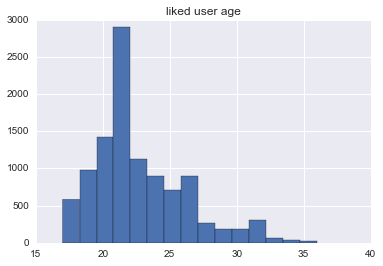

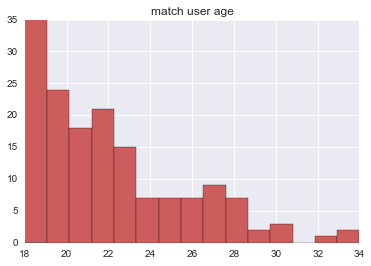

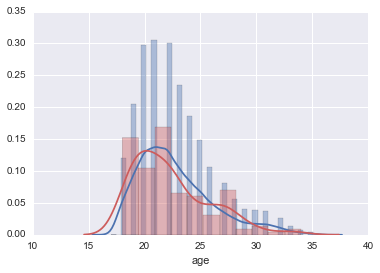

In [12]:
plt.hist(liked_user_df.age, bins=15)
plt.title('liked user age')
plt.show()

plt.hist(match_log_df.age, bins=15, color='indianred')
plt.title('match user age')
plt.show()

# plt.hist(liked_user_df.age, bins=15, normed=True, alpha=0.5)
# plt.hist(match_df.age, bins=15, color='indianred', normed=True, alpha=0.5)
sns.distplot(liked_user_df.age)
sns.distplot(match_log_df.age, color='indianred')

In [13]:
liked_user_df.age.value_counts().sort_index()

17       3
18     580
19     982
20    1422
21    1466
22    1441
23    1123
24     895
25     710
26     512
27     386
28     268
29     190
30     183
31     175
32     127
33      63
34      35
35      20
36       1
dtype: int64

In [23]:
(match_log_df.age.value_counts()/liked_user_df.age.value_counts()).order(ascending=False)

34    0.028571
28    0.026119
19    0.023422
27    0.023316
18    0.020690
20    0.016878
30    0.016393
33    0.015873
22    0.014573
26    0.013672
23    0.013357
21    0.012278
29    0.010526
25    0.009859
32    0.007874
24    0.007821
17         NaN
31         NaN
35         NaN
36         NaN
dtype: float64

(array([  1.,   2.,   2.,   2.,   9.,  25.,  16.,  10.,   1.,   1.,   2.,
          4.,   1.,   1.,   1.,   0.,   0.,   0.,   1.,   0.]),
 array([  0. ,   3.5,   7. ,  10.5,  14. ,  17.5,  21. ,  24.5,  28. ,
         31.5,  35. ,  38.5,  42. ,  45.5,  49. ,  52.5,  56. ,  59.5,
         63. ,  66.5,  70. ]),
 <a list of 20 Patch objects>)

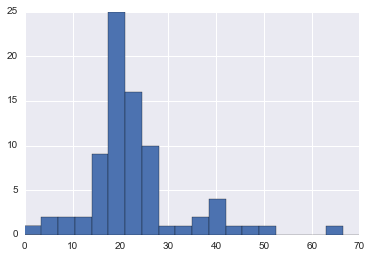

In [15]:
plt.hist(match_df.distance, bins=20, range=(match_df.distance.min(), 70))

(array([ 76.,  20.,   5.,   6.,   6.,   0.,   1.,   1.,   1.,   3.]),
 array([   1. ,   70.1,  139.2,  208.3,  277.4,  346.5,  415.6,  484.7,
         553.8,  622.9,  692. ]),
 <a list of 10 Patch objects>)

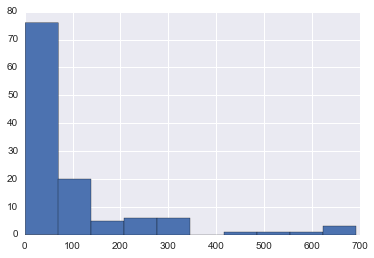

In [22]:
plt.hist(liked_user_df.distance.value_counts(), bins=10)

In [17]:
mismatch_indexs = [i for i in match_log_df.index if i not in match_df.index]
mismatch_df = match_log_df.loc[mismatch_indexs]
mismatch_df

,age,avg_successRate,bio,distance,gender,last_activity_date,match_id,message_count,messages,name,photos
522896fa64d2c66737000008,27,-1.000000,Just another girl with an iPhone.,29,1,2017-08-10T16:23:59.403Z,522896fa64d2c667370000085927bdeb3b0adde27cd8b4a3,0,[],Jacquelyn,[http://images.gotinder.com/522896fa64d2c66737...
540f9ed4819c40b534365c4d,28,-1.000000,名前はオラ\n元クラブ人\nラム酒は恋人\nラムがなければ枯れるくらいorz\n社畜から逃げ...,19,1,2017-06-06T16:51:41.840Z,540f9ed4819c40b534365c4d5927bdeb3b0adde27cd8b4a3,0,[],Oráhimè,[http://images.gotinder.com/540f9ed4819c40b534...
544c415898b25692061cde5b,27,-1.000000,,20,1,2017-06-30T12:49:43.113Z,544c415898b25692061cde5b5927bdeb3b0adde27cd8b4a3,0,[],Ingunn,[http://images.gotinder.com/544c415898b2569206...
5565f582be5532425a157f55,22,-1.000000,i'm ladyboy | line: modoubles_,2851,1,2017-08-17T08:55:04.134Z,5565f582be5532425a157f555927bdeb3b0adde27cd8b4a3,0,[],Ramil,[http://images.gotinder.com/5565f582be5532425a...
562e3299dd39cc9c799fccd2,26,0.576530,友だち募集\n恋愛目的なし,20,1,2017-07-08T15:00:53.399Z,562e3299dd39cc9c799fccd25927bdeb3b0adde27cd8b4a3,0,[],Shiori,[http://images.gotinder.com/562e3299dd39cc9c79...
5642fa3449f718a1363a0c2e,22,0.299749,fooooood\n\n,3294,1,2017-06-06T12:31:17.287Z,5642fa3449f718a1363a0c2e5927bdeb3b0adde27cd8b4a3,0,[],Shannon,[http://images.gotinder.com/5642fa3449f718a136...
570bc4182b4120bd3e7e01c8,33,0.586603,夏がだいすき❤︎\n,17,1,2017-07-31T17:41:59.125Z,570bc4182b4120bd3e7e01c85927bdeb3b0adde27cd8b4a3,0,[],Megumi,[http://images.gotinder.com/570bc4182b4120bd3e...
5798cf058ca62cee7fd5db04,23,-1.000000,はじめましてまして☆\n元エステティシャンです 笑\n彼氏ではなく、\nお友達・仲間が欲しく...,21,1,2017-06-07T15:12:41.831Z,5798cf058ca62cee7fd5db045927bdeb3b0adde27cd8b4a3,0,[],瞳,[http://images.gotinder.com/5798cf058ca62cee7f...
57a9988bdb2fa9870aac4d0f,23,-1.000000,楽しいことが好き😆✨✨\n\n友達とルームシェアしてます😊💖\n社会人です！\n\n自分のラ...,15,1,2017-07-22T02:28:51.936Z,57a9988bdb2fa9870aac4d0f5927bdeb3b0adde27cd8b4a3,0,[],斐子,[http://images.gotinder.com/57a9988bdb2fa9870a...
57c120ba9eda79f9770282d2,27,0.425221,旅行！韓国！大好き！\n普通の社会人してまーす\n한국어공부하고싶어!굿,21,1,2017-07-12T10:19:47.215Z,57c120ba9eda79f9770282d25927bdeb3b0adde27cd8b4a3,0,[],Nana,[http://images.gotinder.com/57c120ba9eda79f977...
